# Capstone Project
# TED Talk Analysis

### Alicia Hide

1. Setting Up
2. Exploration
3. Cleaning
4. NLP Cleaning
5. Storytelling

## 1. Setting Up

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk import RegexpTokenizer
import re
from word2number import w2n
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [53]:
temp = pd.read_csv('TED_Talk.csv')

In [54]:
temp.head()

,talk__id,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,number_of__speakers,...,related_talks,number_of__related_talks,intro_duration,ad_duration,post_ad_duration,external__duration,external__start_time,talks__player_talks__resources__h264__00__bitrate,talks__take_action,number_of__talks__take_actions
0,66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,...,"[{'id': '865', 'hero': 'https://pe.tedcdn.com/...",6,11.82,3.33,0.83,1204.0,0.0,180.0,[],0
1,2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,...,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,589.0,0.0,180.0,[],0
2,1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,...,"[{'id': '1042', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,1263.0,0.0,180.0,[],0
3,848,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,2093.0,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,1,...,"[{'id': '1998', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,1115.0,0.0,180.0,[],0
4,1042,The power of vulnerability,Brené Brown studies human connection -- our ab...,48503432,2234.0,1219,"So, I'll start with this: a couple years ago, ...",TEDx Talk,TEDxHouston,1,...,"[{'id': '1391', 'hero': 'https://s3.amazonaws....",6,11.82,3.33,0.83,1250.0,0.0,180.0,[],0


In [55]:
## Listing which columns I want to use and copying them into a different data frame

df = temp[['talk__name', 'talk__description', 'view_count', 'comment_count', 'duration', 'transcript', 'video_type_name', 'event', 'speaker__name', 'speaker__description', 'recording_date', 'published_timestamp', 'talks__tags', 'number_of__tags']].copy()

In [56]:
df.head()

,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,speaker__name,speaker__description,recording_date,published_timestamp,talks__tags,number_of__tags
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,4952.0,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,Sir Ken Robinson,"Author, educator",2006-02-25,2006-06-27 00:11:00,"['children', 'creativity', 'culture', 'dance',...",7
1,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,288.0,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,James Veitch,Comedian and writer,2015-12-08,2016-01-08 16:03:40,"['comedy', 'curiosity', 'communication', 'humo...",5
2,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,2649.0,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,Amy Cuddy,Social psychologist,2012-06-26,2012-10-01 15:00:08,"['body language', 'brain', 'business', 'psycho...",7
3,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,2093.0,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,Simon Sinek,Leadership expert,2009-09-17,2010-05-04 09:31:00,"['TEDx', 'business', 'entrepreneur', 'leadersh...",5
4,The power of vulnerability,Brené Brown studies human connection -- our ab...,48503432,2234.0,1219,"So, I'll start with this: a couple years ago, ...",TEDx Talk,TEDxHouston,Brené Brown,"Vulnerability researcher, storyteller",2010-06-06,2010-12-23 14:45:00,"['TEDx', 'communication', 'culture', 'depressi...",9


## 2. Exploration

In [57]:
df.shape

(4609, 14)

In [58]:
## I will want to change published date and recording date into datetime objects

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   talk__name            4609 non-null   object 
 1   talk__description     4609 non-null   object 
 2   view_count            4609 non-null   int64  
 3   comment_count         3465 non-null   float64
 4   duration              4609 non-null   int64  
 5   transcript            4091 non-null   object 
 6   video_type_name       4609 non-null   object 
 7   event                 4609 non-null   object 
 8   speaker__name         4608 non-null   object 
 9   speaker__description  3993 non-null   object 
 10  recording_date        4608 non-null   object 
 11  published_timestamp   4609 non-null   object 
 12  talks__tags           4609 non-null   object 
 13  number_of__tags       4609 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 504.2+ KB


In [59]:
## The columns comment_count, transcript, speaker__name, speaker__description, and recording_date have nulls in them
## There's only 1 speaker__name missing, so I will probably be able to find their name
## There's also only 1 recording_date missing, I may be able to find when it was recorded or even guess based on when it was published but this may be less accurate, so I could also drop that 1 row
## The other columns I doubt I can do anything for the nulls, there's quite a lot and for the string columns like transcript and speaker__description I can't fill those and the comment_count I may drop as there are a lot missing and there's not a great way to fill those in.

df.isnull().sum()

talk__name                 0
talk__description          0
view_count                 0
comment_count           1144
duration                   0
transcript               518
video_type_name            0
event                      0
speaker__name              1
speaker__description     616
recording_date             1
published_timestamp        0
talks__tags                0
number_of__tags            0
dtype: int64

In [60]:
## Seems odd that the min duration is 0 - this may be like an error which, if there are not too many, I would be able to look up the video and fill this in

df.describe()

,view_count,comment_count,duration,number_of__tags
count,4.609000e+03,3465.000000,4609.000000,4609.000000
mean,1.945244e+06,161.001154,727.234758,7.532870
std,3.373094e+06,268.126939,393.831092,3.857017
min,0.000000e+00,0.000000,0.000000,0.000000
25%,6.438600e+05,37.000000,411.000000,5.000000
50%,1.272399e+06,88.000000,723.000000,7.000000
75%,2.015748e+06,188.000000,959.000000,9.000000
max,6.567875e+07,6456.000000,5257.000000,33.000000


In [61]:
## There is only 1 talk that has a duration of 0, when I look up this talk it actually has a duration of 11.26 minutes or 686 seconds

df[df['duration'] == 0]

,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,speaker__name,speaker__description,recording_date,published_timestamp,talks__tags,number_of__tags
4376,A business against racism,Villy Wang is in the business of rewriting ste...,11688,NaN,0,NaN,TED Institute Talk,TED@IBM,Villy Wang,Media activist,2016-11-15,2018-02-12 15:05:18,"['race', 'film', 'social change', 'media', 'st...",5


In [62]:
## This is the 1 null in the colum speaker__name
## I can look this up and see that this video was a look back/summary of all the TED talks in 2015
## So, I will drop this row

df[df['speaker__name'].isna()]

,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,speaker__name,speaker__description,recording_date,published_timestamp,talks__tags,number_of__tags
4530,Year In Ideas 2015,The Year In Ideas 2015.,0,NaN,523,NaN,TED Stage Talk,2015,NaN,NaN,2015-12-01,2015-11-30 20:41:15,[],0


In [63]:
## This is the 1 null in the column recording_date
## This is quite difficult to find out exactly when it was recorded, so I will just drop this row

df[df['recording_date'].isna()]

,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,speaker__name,speaker__description,recording_date,published_timestamp,talks__tags,number_of__tags
1887,The unpaid work that GDP ignores -- and why it...,"If you: do laundry, are (or have been) pregnan...",1489041,21.0,1039,(In Maori: My mountain is Taupiri.) (Waikato i...,TEDx Talk,TEDxChristchurch,Marilyn Waring,Economist,NaN,2020-01-23 21:01:15,"['global development', 'development', 'social ...",5


In [64]:
## Having a look at how many different types of talks there are

df['video_type_name'].unique()

array(['TED Stage Talk', 'TEDx Talk', 'TED-Ed Original', 'Best of Web',
       'TED Institute Talk', 'TED Salon Talk (partner)',
       'Original Content', 'Custom sponsored content'], dtype=object)

In [65]:
## Having a look at the different events

df['event'].unique()

array(['TED2006', 'TEDGlobal>Geneva', 'TEDGlobal 2012', 'TEDxPuget Sound',
       'TEDxHouston', 'TEDGlobal 2013', 'TED2016', 'TED2015',
       'TEDxMidAtlantic 2013', 'TEDxMidAtlantic', 'TEDxBeaconStreet',
       'TEDxHull', 'TED2009', 'TEDxSydney', 'TEDGlobal 2011', 'TED2008',
       'TEDMED 2009', 'TED2012', 'TEDGlobal 2009', 'TEDxSF', 'TEDSummit',
       'TEDxBloomington', 'TED Talks Education', 'TED-Ed',
       'TEDxCreativeCoast', 'TED2004', 'TEDIndia 2009', 'TED2017',
       'TEDxSummit', 'TEDSalon NY2013', 'TED2013', 'TEDGlobal>London',
       'TED2007', 'TEDGlobalLondon', 'TEDMED 2015', 'TED2005', 'TED2011',
       'TEDGlobal 2005', 'TED2014', 'TEDxUniversityofNevada',
       'TEDSalon London Fall 2012', 'TEDxManhattanBeach',
       'TED Talks Live', 'TEDWomen 2013', 'TEDxNorrkoping',
       'TEDxLinnaeusUniversity', 'TED2019', 'TEDWomen 2017', 'TEDxMet',
       'TEDMED 2016', 'TEDxAustinWomen', 'TEDWomen 2010', 'TEDWomen 2016',
       'TED2010', 'Stanford University', 'TEDNYC

## 3. Cleaning

In [66]:
## Dropping the row that has a null in speaker_name and in recording_date

df.dropna(subset=['speaker__name', 'recording_date'], inplace=True)

In [67]:
## Dropping columns I don't want

df.drop(columns=['comment_count', 'transcript', 'speaker__description'], inplace=True)

In [68]:
## Filling in the null in the duration column

df['duration'] = df['duration'].replace([0], 686)

In [69]:
## Changing the recording date column into actual dates

df['recording_date'] = pd.to_datetime(df['recording_date'], format='%Y-%m-%d')

In [70]:
## Separating the date and time of published_timestamp into two columns

df[['published_date', 'time']] = df['published_timestamp'].str.split(' ', 1, expand=True)

In [71]:
## Dropping the original column and the column with only the time in it as I will not be using either

df.drop(columns=['published_timestamp', 'time'], inplace=True)

In [72]:
## Changing the published date column into actual dates

df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d')

In [73]:
## Creating a column that works out the time between recording and publishing

df['delay_time'] = df['published_date'] - df['recording_date']

In [74]:
## Renaming most of the columns - this isn't particularly necessary but makes the data frame look nicer

df.rename(columns={'talk__name': 'title', 'talk__description': 'description', 'video_type_name': 'talk_type', 'speaker__name': 'speaker', 'talks__tags': 'tags', 'number_of__tags': 'tag_count'}, inplace=True)

In [75]:
## Re-arranging the order of the columns

df = df[['title', 'description', 'view_count', 'duration', 'talk_type', 'event', 'speaker', 'recording_date', 'published_date', 'delay_time', 'tags', 'tag_count']]

In [76]:
df.head(20)

,title,description,view_count,duration,talk_type,event,speaker,recording_date,published_date,delay_time,tags,tag_count
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,1164,TED Stage Talk,TED2006,Sir Ken Robinson,2006-02-25,2006-06-27,122 days,"['children', 'creativity', 'culture', 'dance',...",7
1,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,588,TED Stage Talk,TEDGlobal>Geneva,James Veitch,2015-12-08,2016-01-08,31 days,"['comedy', 'curiosity', 'communication', 'humo...",5
2,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,1262,TED Stage Talk,TEDGlobal 2012,Amy Cuddy,2012-06-26,2012-10-01,97 days,"['body language', 'brain', 'business', 'psycho...",7
3,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,1084,TEDx Talk,TEDxPuget Sound,Simon Sinek,2009-09-17,2010-05-04,229 days,"['TEDx', 'business', 'entrepreneur', 'leadersh...",5
4,The power of vulnerability,Brené Brown studies human connection -- our ab...,48503432,1219,TEDx Talk,TEDxHouston,Brené Brown,2010-06-06,2010-12-23,200 days,"['TEDx', 'communication', 'culture', 'depressi...",9
5,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",42330489,598,TED Stage Talk,TEDGlobal 2013,Julian Treasure,2013-06-10,2014-06-27,382 days,"['culture', 'sound', 'speech']",3
6,Inside the mind of a master procrastinator,Tim Urban knows that procrastination doesn't m...,39714672,843,TED Stage Talk,TED2016,Tim Urban,2016-02-16,2016-03-15,28 days,"['brain', 'comedy', 'decision-making', 'entert...",15
7,The next outbreak? We're not ready,"In 2014, the world avoided a global outbreak o...",35814459,512,TED Stage Talk,TED2015,Bill Gates,2015-03-18,2015-04-03,16 days,"['disaster relief', 'disease', 'ebola', 'globa...",6
8,My philosophy for a happy life,Born with a rare genetic disorder called proge...,34858496,765,TEDx Talk,TEDxMidAtlantic 2013,Sam Berns,2013-10-25,2018-03-28,1615 days,"['life', 'happiness', 'personal growth', 'self...",5
9,"Looks aren't everything. Believe me, I'm a model.","Cameron Russell admits she won ""a genetic lott...",34572281,577,TEDx Talk,TEDxMidAtlantic,Cameron Russell,2012-10-27,2013-01-16,81 days,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",5


## 4. NLP Cleaning

In [77]:
## Creating a list of stopwords and adding punctuation to it

stop = stopwords.words('english')
stop.extend(string.punctuation)

## Removing words we still want in the data
keep = ['?']
for x in keep:
    stop.remove(x)

## Adding words we do not want in the data
stop.extend(["n't", "'m", "'s"])

In [78]:
def clean(data):
    """Function to clean and prep string data"""
    ## Lowering everything
    data = data.lower()

    ## Tokenize
    tokenizer = RegexpTokenizer(r"[\w']+")
    data = tokenizer.tokenize(data)

    ## Turning Number Words into Actual Numbers
    data_clean = []
    for word in data:
        try:
            word = str(w2n.word_to_num(word))
        except:
            word = word
        data_clean.append(word)

    ## Removing numbers
    data_clean = [re.sub(r'\d+', "", word) for word in data_clean]

    ## Removing Punctuation and Stopwords
    data_clean = [word for word in data_clean if word not in stop]

    return data_clean

In [79]:
## Applying clean function to columns that need cleaning
## The tags column is already clean

df['clean_title'] = df['title'].apply(clean)
df['clean_description'] = df['description'].apply(clean)

In [80]:
def tag_clean(data):
    """Function to clean and prep string data"""
    ## Lowering everything
    data = data.lower()

    ## Tokenize
    tokenizer = RegexpTokenizer(r",", gaps=True)
    data = tokenizer.tokenize(data)

    ## Turning Number Words into Actual Numbers
    data_clean = []
    for word in data:
        try:
            word = str(w2n.word_to_num(word))
        except:
            word = word
        data_clean.append(word)

    ## Removing numbers
    data_clean = [re.sub(r'\d+', "", word) for word in data_clean]

    ## Removing punctuation I don't want
    data_clean = [re.sub(r"'", "", word) for word in data_clean]
    data_clean = [re.sub(r"\[", "", word) for word in data_clean]
    data_clean = [re.sub(r"]", "", word) for word in data_clean]

    return data_clean

In [81]:
df['clean_tags'] = df['tags'].apply(tag_clean)

In [82]:
## Looking at the final cleaned data frame

df.head()

,title,description,view_count,duration,talk_type,event,speaker,recording_date,published_date,delay_time,tags,tag_count,clean_title,clean_description,clean_tags
0,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,65678748,1164,TED Stage Talk,TED2006,Sir Ken Robinson,2006-02-25,2006-06-27,122 days,"['children', 'creativity', 'culture', 'dance',...",7,"[schools, kill, creativity]","[sir, ken, robinson, makes, entertaining, prof...","[children, creativity, culture, dance, edu..."
1,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",59725446,588,TED Stage Talk,TEDGlobal>Geneva,James Veitch,2015-12-08,2016-01-08,31 days,"['comedy', 'curiosity', 'communication', 'humo...",5,"[happens, reply, spam, email]","[suspicious, emails, unclaimed, insurance, bon...","[comedy, curiosity, communication, humor, ..."
2,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,57734063,1262,TED Stage Talk,TEDGlobal 2012,Amy Cuddy,2012-06-26,2012-10-01,97 days,"['body language', 'brain', 'business', 'psycho...",7,"[body, language, may, shape]","[note, findings, presented, talk, referenced, ...","[body language, brain, business, psychology..."
3,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,50494918,1084,TEDx Talk,TEDxPuget Sound,Simon Sinek,2009-09-17,2010-05-04,229 days,"['TEDx', 'business', 'entrepreneur', 'leadersh...",5,"[great, leaders, inspire, action]","[simon, sinek, simple, powerful, model, inspir...","[tedx, business, entrepreneur, leadership, ..."
4,The power of vulnerability,Brené Brown studies human connection -- our ab...,48503432,1219,TEDx Talk,TEDxHouston,Brené Brown,2010-06-06,2010-12-23,200 days,"['TEDx', 'communication', 'culture', 'depressi...",9,"[power, vulnerability]","[brené, brown, studies, human, connection, abi...","[tedx, communication, culture, depression, ..."


In [83]:
## Saving the final version to use in Tableau
## df.to_csv('TED_Talk_Data.csv')

## 5. Storytelling

### The Talks

In [84]:
## The total view count
## Nearly 9 billion views altogether

df['view_count'].sum()

8964142812

In [85]:
## The average length of each talk

df['duration'].mean()

727.3603212502713

In [86]:
## The amount of talks that have been published each year

yr_output = df.groupby(df['published_date'].dt.strftime('%Y'))[['title']].count().sort_values(['published_date'], ascending = True).reset_index()
yr_output.rename(columns={'title':'published', 'published_date':'date'}, inplace=True)
yr_output

,date,published
0,2006,49
1,2007,122
2,2008,188
3,2009,222
4,2010,254
5,2011,260
6,2012,306
7,2013,243
8,2014,240
9,2015,220


In [87]:
## The mean amount of talks published in a year

yr_output['published'].median()

243.0

In [88]:
## The amount of talks that have been published each month

mn_output = df.groupby(df['published_date'].dt.strftime('%Y/%m'))[['title']].count().sort_values(['published_date'], ascending = True).reset_index()
mn_output.rename(columns={'title':'published', 'published_date':'date'}, inplace=True)
mn_output.head()

,date,published
0,2006/06,5
1,2006/07,7
2,2006/08,10
3,2006/09,8
4,2006/10,11


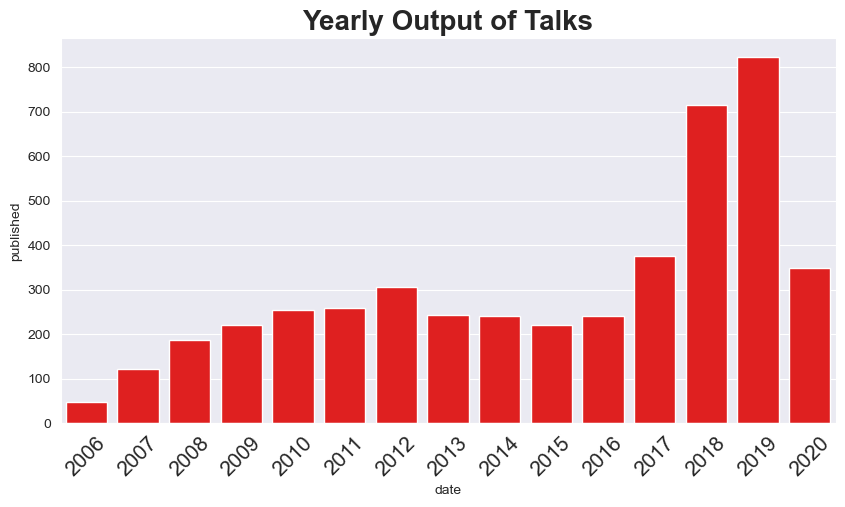

In [89]:
plt.figure(figsize=(10, 5))

sns.barplot(data= yr_output,
            x='date',
            y='published',
            color='Red')

plt.xticks(rotation = 45,
           horizontalalignment='center',
           fontweight='medium',
           fontsize='15'
           )

plt.title(label='Yearly Output of Talks',
          fontsize=20,
          fontweight='heavy')

plt.show()

In [90]:
## The amount of talks that have been recorded each year

yr_record = df.groupby(df['recording_date'].dt.strftime('%Y'))[['title']].count().sort_values(['recording_date'], ascending = True).reset_index()
yr_record.rename(columns={'title':'recorded', 'recording_date':'date'}, inplace=True)
yr_record.head()

,date,recorded
0,1972,1
1,1983,1
2,1984,1
3,1990,1
4,1991,1


In [91]:
## The mean amount of talks recorded in a year

yr_record['recorded'].median()

84.0

In [92]:
## The amount of talks that have been recorded each month

mn_record = df.groupby(df['recording_date'].dt.strftime('%Y/%m'))[['title']].count().sort_values(['recording_date'], ascending = True).reset_index()
mn_record.rename(columns={'title':'recorded', 'recording_date':'date'}, inplace=True)
mn_record.head()

,date,recorded
0,1972/05,1
1,1983/07,1
2,1984/02,1
3,1990/03,1
4,1991/12,1


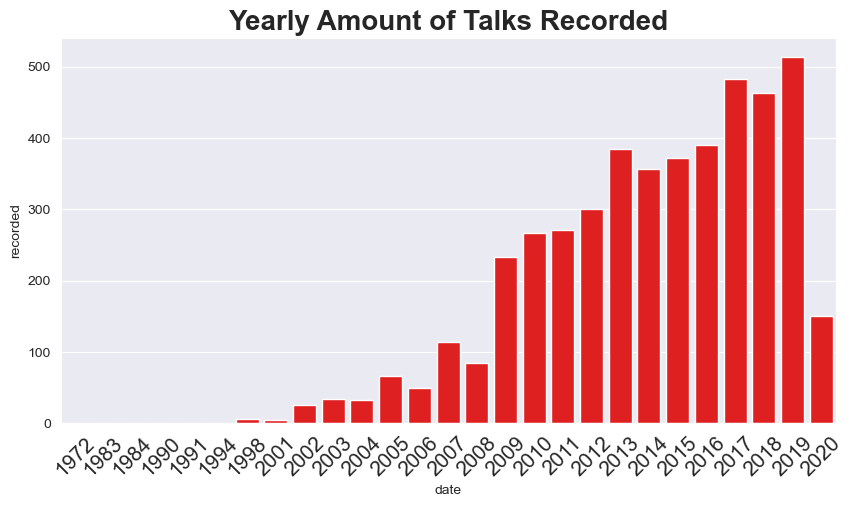

In [93]:
plt.figure(figsize=(10, 5))

sns.barplot(data= yr_record,
            x='date',
            y='recorded',
            color='Red')

plt.xticks(rotation = 45,
           horizontalalignment='center',
           fontweight='medium',
           fontsize='15'
           )

plt.title(label='Yearly Amount of Talks Recorded',
          fontsize=20,
          fontweight='heavy')

plt.show()

In [94]:
## Combining month output and month record into the same table
## Then saving the table to be used in Tableau

record_publish = pd.merge(left=mn_output, right=mn_record, how='inner', on='date')
record_publish = pd.melt(record_publish, id_vars='date', value_vars=['published', 'recorded'])
## record_publish.to_csv('record_publish.csv')

In [95]:
record_publish

,date,variable,value
0,2006/09,published,8
1,2006/11,published,4
2,2006/12,published,4
3,2007/01,published,8
4,2007/02,published,5
...,...,...,...
303,2020/02,recorded,28
304,2020/03,recorded,27
305,2020/04,recorded,32
306,2020/05,recorded,24


In [96]:
## The number of times different events have taken place over time

df.groupby(df['event'])[['title']].count().sort_values(['title'], ascending = False).head(15).reset_index()

,event,title
0,TED-Ed,590
1,TED2018,104
2,TED2019,101
3,TED2017,97
4,TED2009,84
5,TED2014,84
6,TED2016,77
7,TED2015,75
8,TED2013,75
9,TEDGlobal 2012,70


In [97]:
## The number of individual events each year

no_events = df.groupby(df['recording_date'].dt.strftime('%Y/%m'))[['event']].nunique().sort_values(['recording_date'], ascending=True).reset_index()
no_events.rename(columns={'recording_date':'date'}, inplace=True)
no_events.head(30)

,date,event
0,1972/05,1
1,1983/07,1
2,1984/02,1
3,1990/03,1
4,1991/12,1
5,1994/02,1
6,1998/02,1
7,2001/02,1
8,2001/05,1
9,2002/02,1


In [98]:
## Looking at the average delay time between recording a talk and publishing

df['delay_time'].mean()

Timedelta('349 days 05:32:34.330366832')

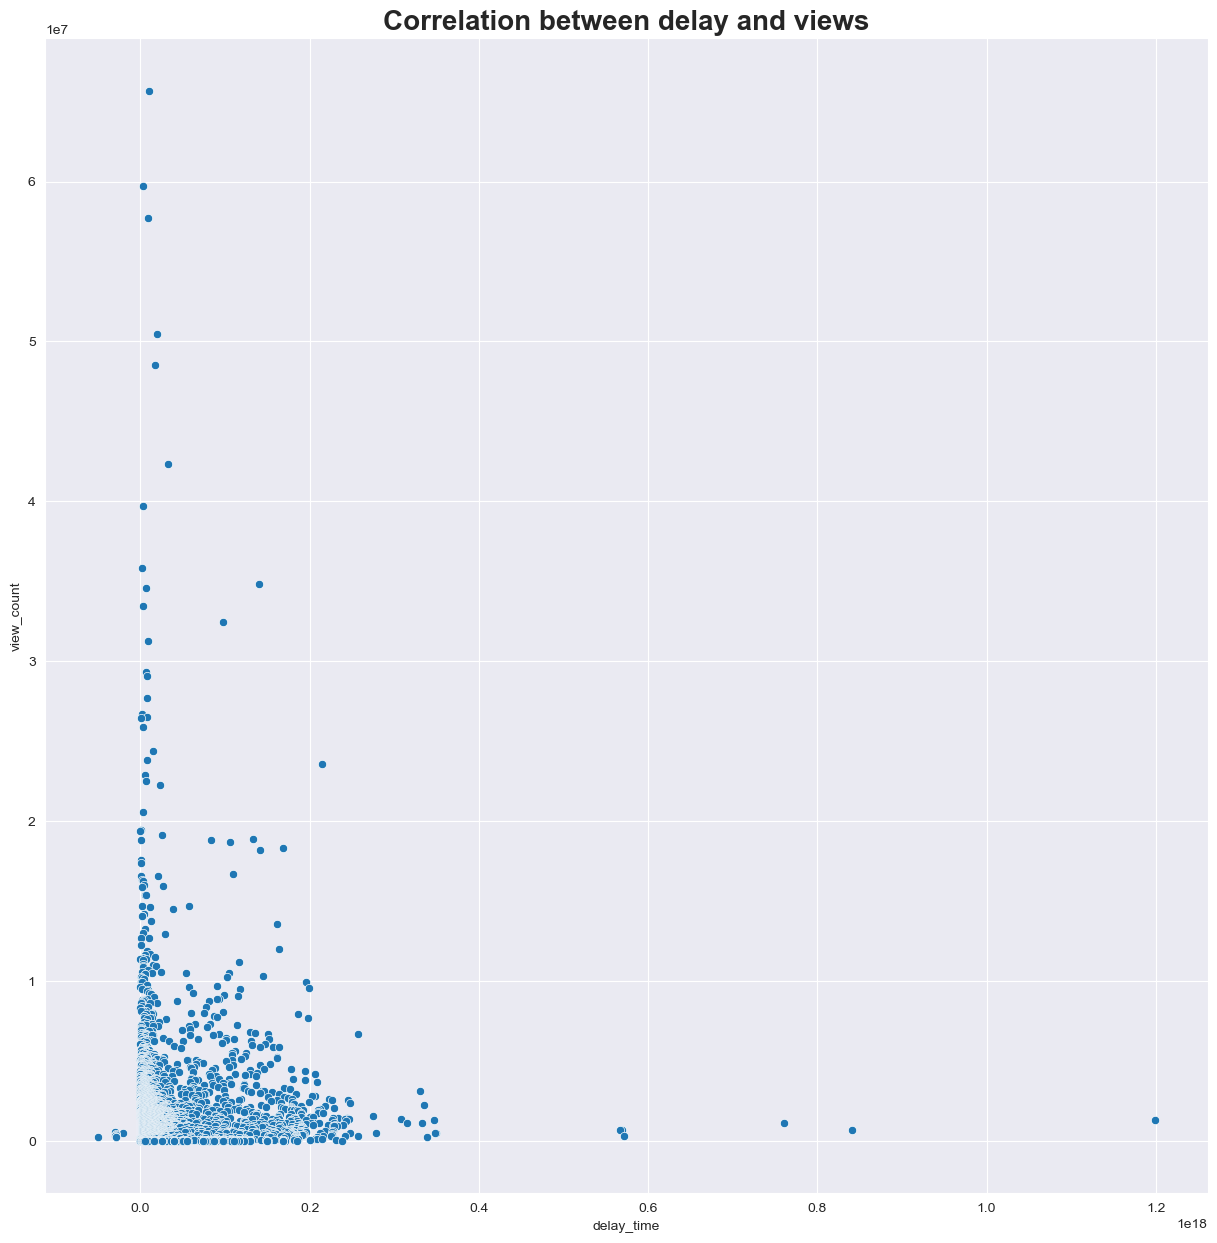

In [99]:
## Looking at the relationship between delay time and view count

plt.figure(figsize=(15, 15))

sns.scatterplot(x='delay_time',
                y='view_count',
                data=df,
                palette='coolwarm')

plt.title(label='Correlation between delay and views',
          fontsize = 20,
          fontweight='heavy')

plt.show()

In [100]:
## Looking at the amount of different types of talks

types = df.groupby(df['talk_type'])[['title']].count().sort_values(['title'], ascending = False).reset_index()
types

,talk_type,title
0,TED Stage Talk,2554
1,TEDx Talk,856
2,TED-Ed Original,591
3,TED Institute Talk,395
4,Best of Web,76
5,Original Content,73
6,TED Salon Talk (partner),58
7,Custom sponsored content,4


In [101]:
## TED stage talk - these are the official TED Talks on a stage that TED produce
## TEDx talk - these are still on a stage, but they're by more independent people who are using TED's guidelines and stuff
## TED-ED original - these are shorter animated videos with a focus on being educational
## TED institute talk - these are talks more with/for businesses and companies
## Best of web - these are talks that TED have been allowed to publish, but I don't think they actually produced them
## Original content - talks that are from TED
## TED salon talk - these are smaller more intimate talks about global topics
## Custom sponsored content - these are talks that are made with other companies

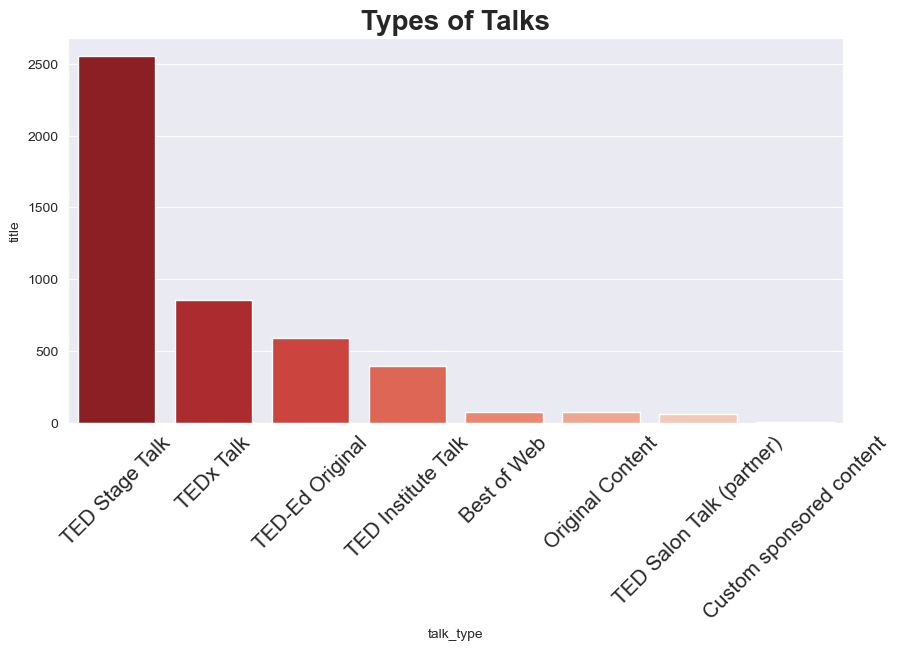

In [102]:
plt.figure(figsize=(10, 5))

sns.barplot(data= types,
            x='talk_type',
            y='title',
            palette='Reds_r')

plt.xticks(rotation = 45,
           horizontalalignment='center',
           fontweight='medium',
           fontsize='15'
           )

plt.title(label='Types of Talks',
          fontsize=20,
          fontweight='heavy')

plt.show()

### The Speakers

In [103]:
## The number of speakers

df['speaker'].nunique()

3840

In [104]:
## Speakers in order of how many talks they have done

top_speaker = df.groupby('speaker')[['title']].count().sort_values(['title'], ascending=False).reset_index()
top_speaker.head(10)

,speaker,title
0,Alex Gendler,34
1,Iseult Gillespie,20
2,Alex Rosenthal,11
3,Emma Bryce,11
4,Daniel Finkel,11
5,Juan Enriquez,10
6,Hans Rosling,9
7,Greg Gage,9
8,Elizabeth Cox,7
9,Marco Tempest,7


In [105]:
## The average amount of talks a speaker does

top_speaker['title'].mean()

1.1997395833333333

In [106]:
## Nearly all the top speakers only do TED-ED original talks

df[['speaker', 'talk_type']][df['speaker'] == 'Alex Gendler']

,speaker,talk_type
33,Alex Gendler,TED-Ed Original
38,Alex Gendler,TED-Ed Original
73,Alex Gendler,TED-Ed Original
105,Alex Gendler,TED-Ed Original
165,Alex Gendler,TED-Ed Original
198,Alex Gendler,TED-Ed Original
225,Alex Gendler,TED-Ed Original
284,Alex Gendler,TED-Ed Original
412,Alex Gendler,TED-Ed Original
429,Alex Gendler,TED-Ed Original


In [107]:
## The most popular speakers in terms of average view count

pop_speaker = df.groupby('speaker')[['view_count']].mean().sort_values(['view_count'], ascending=False).head(10).reset_index()
pop_speaker

,speaker,view_count
0,Amy Cuddy,57734063.0
1,James Veitch,41297061.0
2,Tim Urban,39714672.0
3,Sam Berns,34858496.0
4,Cameron Russell,34572281.0
5,Robert Waldinger,33478530.0
6,Graham Shaw,32441676.0
7,Simon Sinek,31873414.0
8,Mary Roach,31285464.0
9,Brené Brown,31284279.5


### The Topics

In [108]:
## Looking at the average amount of views a talk with a question in the title gets

question_titles = df[df['title'].str.contains('\?')]
question_titles['view_count'].mean()

2273528.4510779437

In [109]:
## Looking at the average amount of views a talk without a question in the title gets

statement_titles = df[~df['title'].str.contains('\?')]
statement_titles['view_count'].mean()

1896404.884115884

In [110]:
## Counting the number of occurences of a word in the titles

lister = [x for x in df['clean_title']]
newlist = [item for items in lister for item in items]
common_words = Counter(newlist)
print(common_words)

Counter({'': 351, 'life': 142, 'world': 124, 'new': 117, 'future': 109, 'us': 101, 'art': 81, 'make': 80, 'change': 79, 'work': 76, 'need': 73, 'help': 73, 'brain': 72, 'could': 72, 'like': 70, 'power': 64, 'human': 62, 'better': 61, 'people': 60, 'science': 59, 'solve': 59, 'time': 57, 'history': 56, 'love': 53, 'way': 52, 'story': 51, 'get': 50, 'global': 50, 'data': 50, 'ways': 48, 'women': 47, 'good': 46, "let's": 46, 'design': 46, 'health': 45, 'kids': 45, 'secret': 43, 'next': 42, 'think': 42, 'music': 42, 'climate': 41, 'riddle': 40, 'fight': 40, 'real': 40, 'know': 39, 'teach': 39, 'makes': 36, 'build': 36, 'read': 35, "world's": 35, 'use': 35, 'talk': 34, 'lessons': 33, 'end': 33, 'learn': 33, 'space': 32, 'crisis': 32, 'inside': 31, "we're": 31, 'learned': 31, 'city': 31, 'technology': 30, 'universe': 30, 'ai': 30, "what's": 30, 'made': 30, 'really': 29, 'behind': 29, 'social': 29, 'save': 29, 'internet': 29, 'cancer': 29, 'africa': 29, 'want': 28, 'lives': 28, 'beauty': 28, 

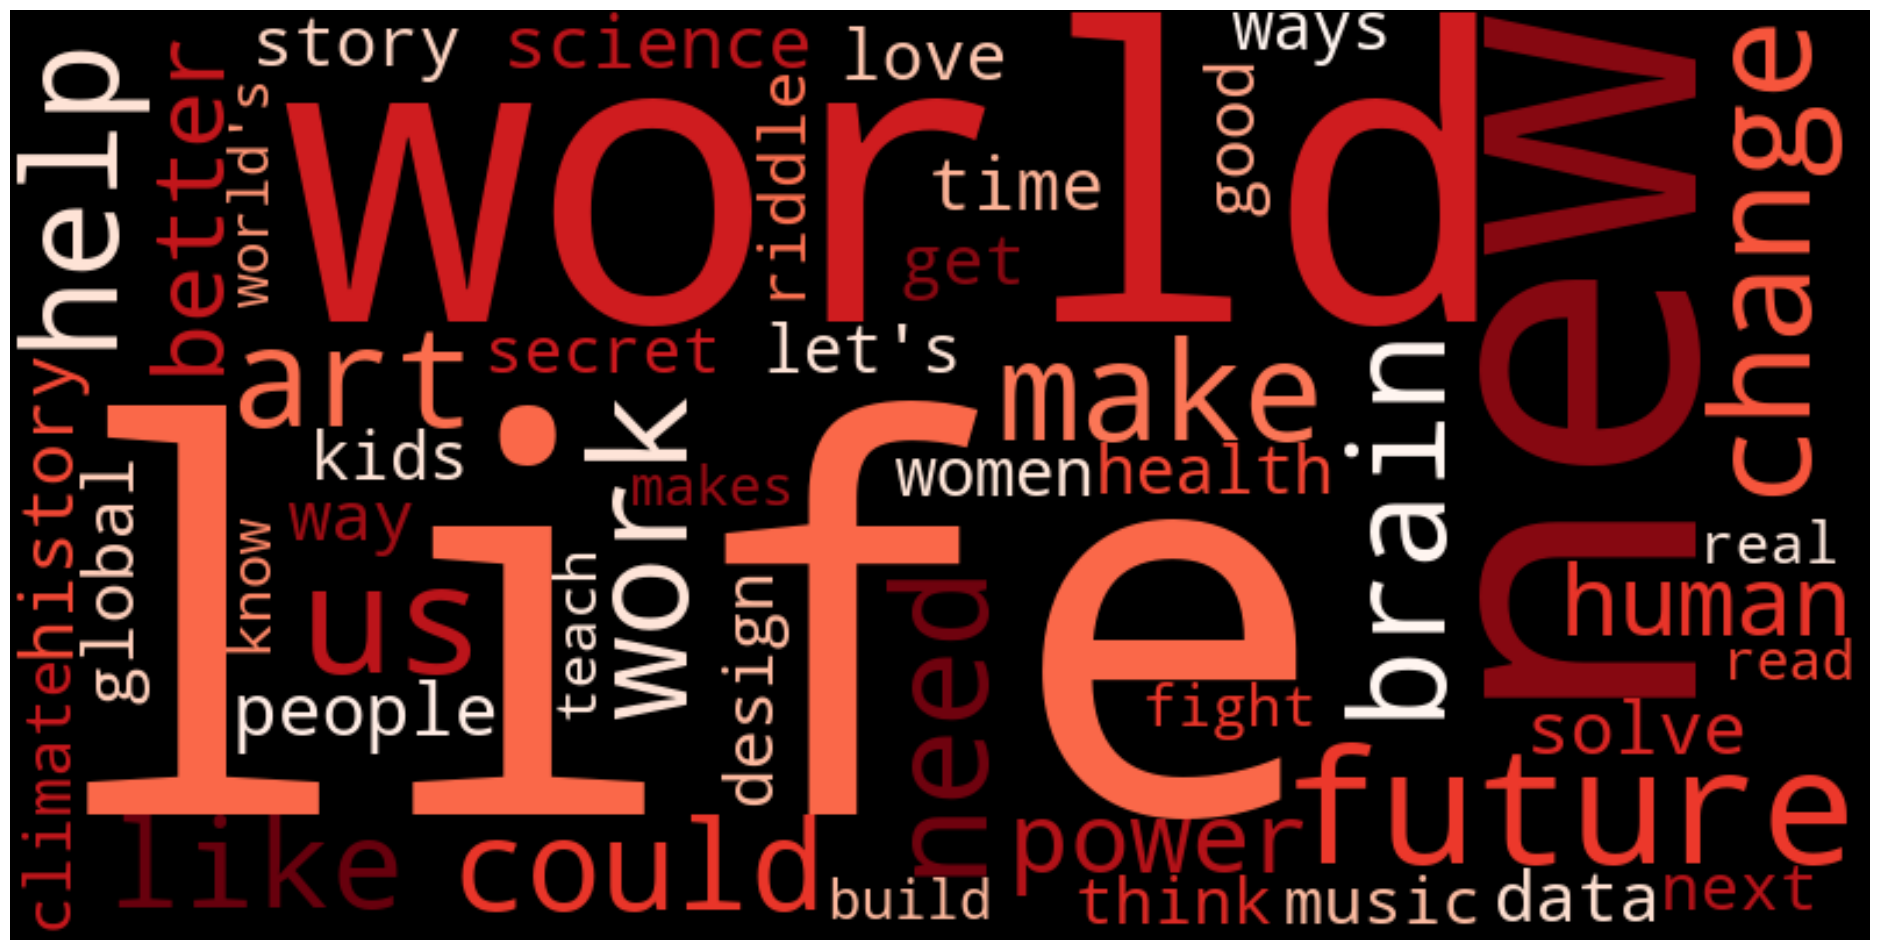

In [111]:
## Making a wordcloud of them

wc = WordCloud(width=800, height=400, max_words=50, colormap='Reds').generate_from_frequencies(common_words)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## wc.to_file('title.png')

In [112]:
## Doing the same thing with the tags

lister = [x for x in df['clean_tags']]
newlist = [item for items in lister for item in items]
common_tags = Counter(newlist)
print(common_tags)

Counter({' technology': 1030, ' science': 978, ' society': 611, ' culture': 593, ' social change': 552, ' global issues': 550, ' design': 486, ' humanity': 409, ' animation': 409, ' history': 402, ' innovation': 399, ' health': 398, ' education': 395, ' ted-ed': 362, ' future': 339, 'tedx': 331, ' entertainment': 315, ' biology': 313, ' community': 302, ' communication': 299, ' business': 281, ' medicine': 279, ' creativity': 273, ' tedx': 270, 'business': 244, ' personal growth': 239, ' environment': 238, ' economics': 237, 'ted-ed': 235, ' health care': 235, ' art': 233, ' nature': 231, ' collaboration': 230, ' invention': 224, ' psychology': 223, ' identity': 214, ' politics': 207, ' women': 197, ' life': 192, ' brain': 188, ' music': 187, ' performance': 187, ' medical research': 179, ' activism': 179, ' storytelling': 174, ' human body': 169, ' computers': 164, ' inequality': 164, ' work': 163, ' engineering': 163, ' public health': 163, ' war': 162, ' data': 156, ' government': 1

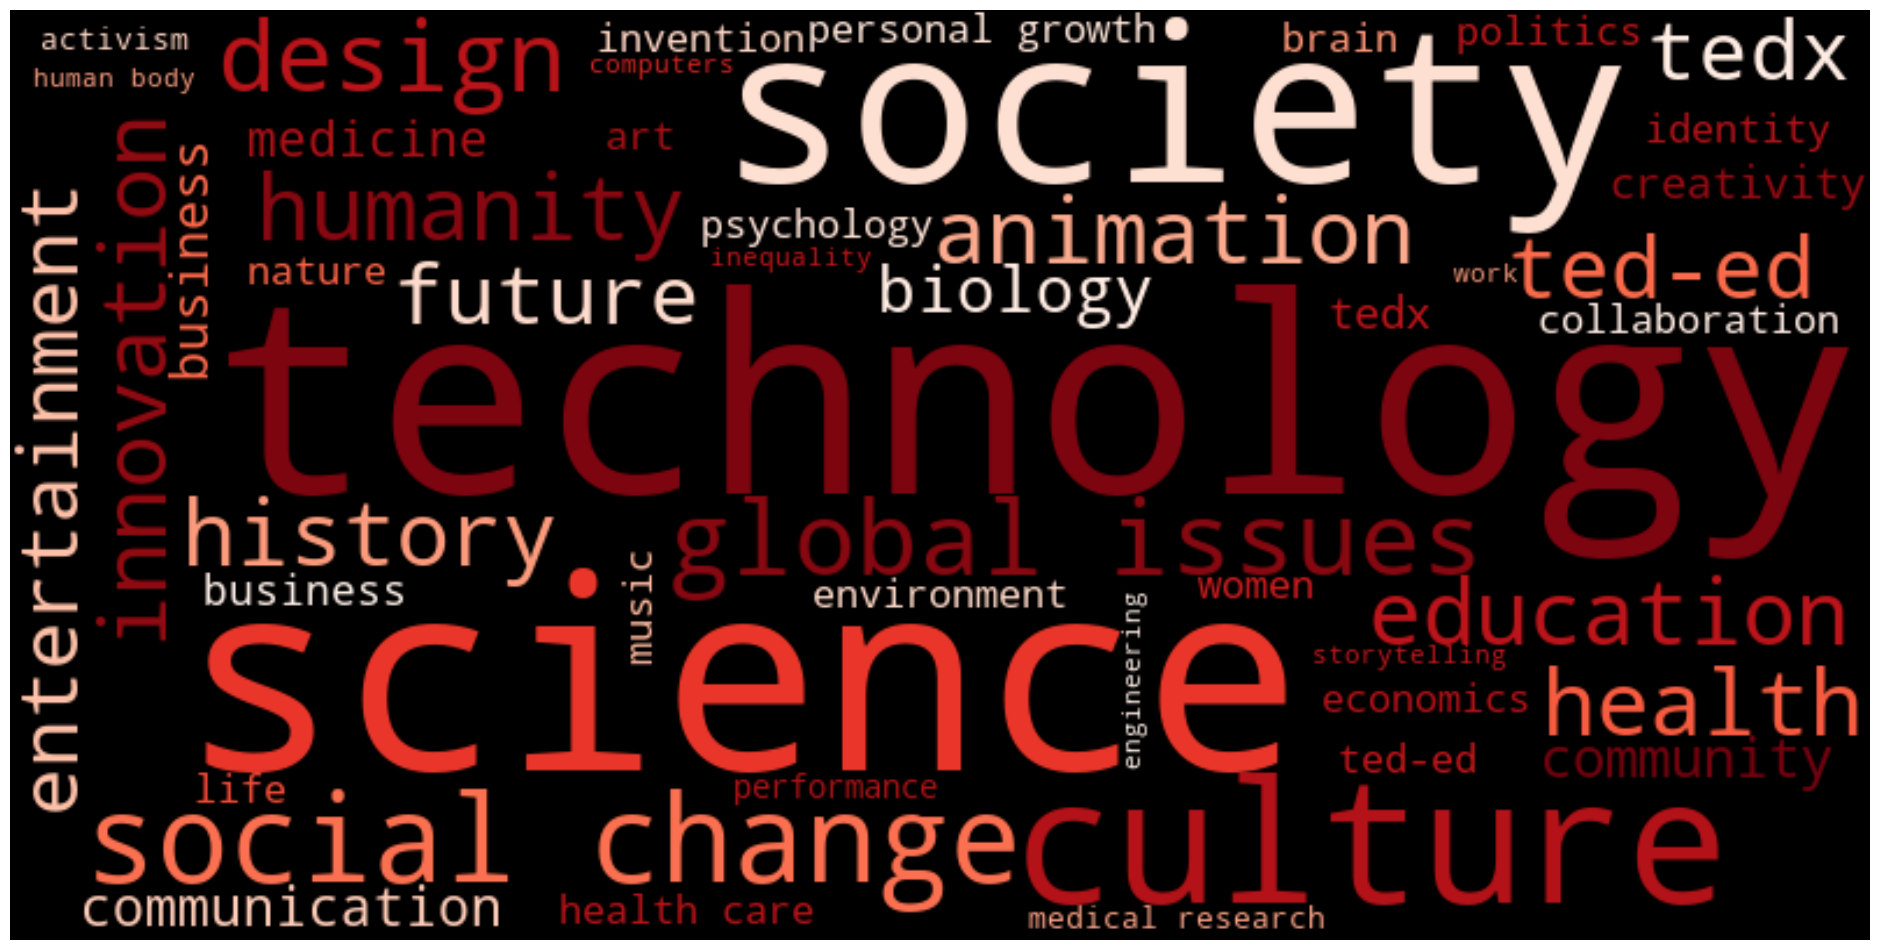

In [113]:
wc = WordCloud(width=800, height=400, max_words=50, colormap='Reds').generate_from_frequencies(common_tags)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## wc.to_file('tags.png')

In [114]:
## Creating a table of just the tags in a specific year

year = df[df['published_date'].dt.year == 2020]

In [115]:
## Looking at the top tags in that year
## Then changing the year above

lister = [x for x in year['clean_tags']]
newlist = [item for items in lister for item in items]
common_tags = Counter(newlist)
print(common_tags)

Counter({' education': 107, ' animation': 85, ' ted-ed': 77, ' history': 67, ' science': 61, ' technology': 49, ' social change': 47, ' society': 47, ' culture': 41, 'ted-ed': 41, ' humanity': 36, ' health': 33, ' tedx': 33, 'animation': 32, ' biology': 32, ' community': 29, ' coronavirus': 28, ' public health': 27, ' creativity': 26, ' medicine': 25, ' psychology': 24, ' innovation': 24, ' disease': 22, ' global issues': 21, ' brain': 21, ' activism': 21, ' government': 21, ' inequality': 21, ' health care': 20, ' women': 20, ' illness': 19, ' human body': 19, 'education': 19, ' future': 19, ' pandemic': 18, ' medical research': 18, ' united states': 18, ' invention': 18, ' virus': 17, ' economics': 17, ' identity': 17, ' life': 17, ' computers': 17, ' design': 16, ' storytelling': 15, ' world cultures': 15, ' climate change': 15, ' environment': 15, ' math': 15, ' communication': 15, ' animals': 14, ' business': 14, ' nature': 14, ' personal growth': 13, ' engineering': 13, ' emotion